# Análisis y Predicción de Ventas en una Tienda de Retail (Core)

## Parte V: Exploración y Visualización de Datos Avanzada

En esta quinta parte del proyecto, vamos a expandir nuestro análisis exploratorio de datos (EDA) y visualización utilizando técnicas avanzadas. Aplicaremos todo lo que hemos aprendido hasta ahora, incluyendo cuadrículas, leyendas, anotaciones, flechas, y subplots, para obtener una comprensión más profunda de nuestro conjunto de datos de ventas.

### Instrucciones

#### 1. Continuar desde la Parte IV

* Asegúrate de tener el DataFrame df ya cargado y preparado desde la Parte IV.

#### 2. Exploración de Datos Avanzada

* Realiza un análisis de correlación y crea un mapa de calor para visualizar las relaciones entre las variables.
* Crea subplots para comparar diferentes variables clave.
* Añade cuadrículas, leyendas, anotaciones y flechas a tus gráficos para mejorar la claridad y la información.

#### 3. Generar un Pull Request en GitHub

* Generar un Tag en GitHub: Después de completar el análisis y las visualizaciones, sube los cambios a una nueva rama en tu repositorio de GitHub, genera un Pull Request (PR) para revisión y finalmente crea un tag para esta versión del proyecto.
* Realizar una Presentación: Prepara una presentación en slides que resuma tu análisis y visualizaciones. La presentación debe incluir:

    * Introducción y objetivos del proyecto.
    * Descripción del conjunto de datos.
    * Principales análisis y hallazgos.
    * Visualizaciones clave con explicación.
    * Conclusiones y recomendaciones.



## Resolución Parte III

### Carga de Datos

Se procede a cargar los datos desde el punto en que quedó en la parte 2.

In [59]:
import pandas as pd

camino_dataset = "../data/retail_sales_dataset.csv"

df = pd.read_csv(camino_dataset)

# Genera estadísticas descriptivas del DataFrame utilizando el método describe().
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [60]:
# Análisis de coeficiente de variación
from utils import variation_coefficient

df[["Age", "Quantity", "Price per Unit", "Total Amount"]].agg(["mean", "std", variation_coefficient])

,Age,Quantity,Price per Unit,Total Amount
mean,41.392000,2.514000,179.890000,456.000000
std,13.681430,1.132734,189.681356,559.997632
variation_coefficient,0.330533,0.450571,1.054430,1.228065


De estos datos, se puede determinar que la media no es un factor relevante para Quantity, Price per Unit, Total Amount. Podría influir en el caso de la edad, pero se determinaría más adelante.

Finalmente, también se analiza si existen datos nulos, en caso de que sirva para más adelante.

In [61]:
from utils import obtener_estadisticas_datos_nulos

df_estadisticas = obtener_estadisticas_datos_nulos(df)

df_estadisticas

,datos sin NAs en q,Na en q,Na en %
Transaction ID,1000,0,0.0
Date,1000,0,0.0
Customer ID,1000,0,0.0
Gender,1000,0,0.0
Age,1000,0,0.0
Product Category,1000,0,0.0
Quantity,1000,0,0.0
Price per Unit,1000,0,0.0
Total Amount,1000,0,0.0


Al parecer, no existe ningún dato nulo en el dataset.

### Transformación y Agregación


Ya existe la columna de Total Amount, pero de igual manera se agregará una nueva columna y se calculará la diferencia respecto a la columna disponible en el dataset. Esto servirá también para ver si coinciden los valores de precio por unidad y cantidades vs el monto total por venta.

In [62]:
df["Calculated Total Amount"] = df["Price per Unit"] * df["Quantity"]

df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Calculated Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200,200


Para analizar si hay una diferencia significativa entre la columna calculada y la columna de total original, se pueden restar ambas y sacar estadísticas (promedio, desviación estándar).

In [63]:
diferencia = abs(df["Total Amount"] - df["Calculated Total Amount"])

diferencia.agg(["mean", "std", "min", "max"])

mean    0.0
std     0.0
min     0.0
max     0.0
dtype: float64

Según las estadísticas de la columna, no existe ninguna diferencia entre la columna calculada y la del dataset.

Se procede a clasificar las ventas. Para esto, se toma el maximo y el mínimo de la columna Total Amount, se resta y la diferencia se divide entre 3

In [64]:
min_ventas = df["Total Amount"].min()
max_ventas = df["Total Amount"].max()

print(f"Valor mínimo de ventas: {min_ventas}")
print(f"Valor máximo de ventas: {max_ventas}")

diferencia = max_ventas - min_ventas

print(f"Diferencia entre max. y min.: {diferencia}")

inicio_bajas = min_ventas
# El límite de ventas bajas iría de min_ventas a limite_bajas, la cual cubre el tercio mas bajo de la diferencia.
limite_bajas = min_ventas + (float(diferencia) / 3)
# El límite de ventas medias iría de min_ventas a limite_bajas, la cual cubre el tercio mas bajo de la diferencia.
limite_medias = limite_bajas + (float(diferencia) / 3)
# El límite de ventas altas iría de limite_medias a max_ventas, la cual cubre el tercio mas bajo de la diferencia.
# También es posible usar aquí una suma similar a los otros grupos, solo que para evitar diferencias
# mínimas debido al uso de decimales, es mejor usar nada más ya max_ventas
limite_altas = max_ventas

print(f"Rango de ventas bajas: De {inicio_bajas} a {limite_bajas:.2f}")
print(f"Rango de ventas medias: De {limite_bajas:.2f} a {limite_medias:.2f}")
print(f"Rango de ventas altas: De {limite_medias:.2f} a {limite_altas}")

Valor mínimo de ventas: 25
Valor máximo de ventas: 2000
Diferencia entre max. y min.: 1975
Rango de ventas bajas: De 25 a 683.33
Rango de ventas medias: De 683.33 a 1341.67
Rango de ventas altas: De 1341.67 a 2000


Por tanto, se crean tres grupos:

* Primer grupo (Baja)
* Segundo grupo (Media)
* Tercer grupo (Alta)

Estos grupos se incorporarán como una columna categórica en el conjunto de datos. El límite inferior de cada grupo es inclusivo, mientras que el límite superior es exclusivo.

In [65]:
def funcion_clasificacion(x):
    if inicio_bajas <= x["Total Amount"] < limite_bajas:
        return "Baja"
    elif limite_bajas <= x["Total Amount"] < limite_medias:
        return "Media"
    elif limite_medias <= x["Total Amount"]:
        return "Alta"


df["Sale Classification"] = df.apply(funcion_clasificacion, axis=1)
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Calculated Total Amount,Sale Classification
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150,Baja
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000,Media
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30,Baja
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500,Baja
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100,Baja
...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,50,Baja
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,90,Baja
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,100,Baja
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,150,Baja


### Agrupación y Agregación

Se procede a agregar los grupos y a analizar los datos con agregaciones.

##### Agrupación y Agregación por Género

In [66]:
df.groupby("Gender")["Total Amount"].agg(["mean", "std", "min", "max", variation_coefficient])

,mean,std,min,max,variation_coefficient
Gender,,,,,
Female,456.549020,554.299371,25,2000,1.214107
Male,455.428571,566.433809,25,2000,1.243738


In [67]:
df.groupby("Gender")["Age"].agg(["mean", "std", "min", "max", variation_coefficient])

,mean,std,min,max,variation_coefficient
Gender,,,,,
Female,41.356863,13.568067,18,64,0.328073
Male,41.428571,13.812208,18,64,0.333398


##### Agrupación y Agregación por Product Category

In [68]:
df.groupby("Product Category")["Total Amount"].agg(["mean", "std", "min", "max", variation_coefficient])

,mean,std,min,max,variation_coefficient
Product Category,,,,,
Beauty,467.475570,563.612788,25,2000,1.205652
Clothing,443.247863,550.695917,25,2000,1.242411
Electronics,458.786550,567.540150,25,2000,1.237046


In [69]:
df.groupby("Product Category")["Age"].agg(["mean", "std", "min", "max", variation_coefficient])

,mean,std,min,max,variation_coefficient
Product Category,,,,,
Beauty,40.371336,13.889817,18,64,0.344051
Clothing,41.948718,13.498262,18,64,0.321780
Electronics,41.736842,13.669573,18,64,0.327518


#### Agrupación y Agregación por Sale Classification.

In [70]:
df.groupby("Sale Classification")["Total Amount"].agg(["mean", "std", "min", "max", variation_coefficient])

,mean,std,min,max,variation_coefficient
Sale Classification,,,,,
Alta,1747.474747,251.259454,1500,2000,0.143784
Baja,154.076087,157.650788,25,600,1.023201
Media,1027.878788,127.158380,900,1200,0.123710


En esta agrupación, se puede notar que el coeficiente de variación para las categorías alta y media son menores al 30%, por lo cual tal vez sea útil el promedio en estos casos.

In [71]:
df.groupby("Sale Classification")["Age"].agg(["mean", "std", "min", "max", variation_coefficient])

,mean,std,min,max,variation_coefficient
Sale Classification,,,,,
Alta,39.202020,13.616451,18,64,0.347341
Baja,41.841033,13.694251,18,64,0.327292
Media,40.703030,13.589462,18,64,0.333869


### Análisis personalizado con apply.

Ya se realizó un apply previamente, pero se agrega también la columna de diferencia con desviación estandar de las ventas.

In [72]:
std_dev = df["Total Amount"].std()

print(f"Desviación estándar {std_dev}")

df["Total Amount Stdev Difference"] = df.apply(lambda x: abs(x["Total Amount"] - std_dev), axis=1)
df

Desviación estándar 559.997631555123


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Calculated Total Amount,Sale Classification,Total Amount Stdev Difference
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150,Baja,409.997632
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000,Media,440.002368
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30,Baja,529.997632
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500,Baja,59.997632
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100,Baja,459.997632
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,50,Baja,509.997632
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,90,Baja,469.997632
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,100,Baja,459.997632
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,150,Baja,409.997632


# Resolución Parte IV

### Análisis Descriptivo y Visualización

#### Calcula estadísticas descriptivas básicas para comprender mejor las características de los datos.

In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,1000.0,500.500000,288.819436,1.000000,250.750000,500.500000,750.250000,1000.000000
Age,1000.0,41.392000,13.681430,18.000000,29.000000,42.000000,53.000000,64.000000
Quantity,1000.0,2.514000,1.132734,1.000000,1.000000,3.000000,4.000000,4.000000
Price per Unit,1000.0,179.890000,189.681356,25.000000,30.000000,50.000000,300.000000,500.000000
Total Amount,1000.0,456.000000,559.997632,25.000000,60.000000,135.000000,900.000000,2000.000000
Calculated Total Amount,1000.0,456.000000,559.997632,25.000000,60.000000,135.000000,900.000000,2000.000000
Total Amount Stdev Difference,1000.0,496.319048,279.006281,40.002368,359.997632,469.997632,529.997632,1440.002368


Calculamos el coeficiente de variación para determinar si los promedios son útiles.

In [74]:
from utils import obtener_estadisticas_descriptivas_df_es


df_estadisticas = obtener_estadisticas_descriptivas_df_es(df, 2)
df_estadisticas.T

,Mínimo,Máximo,Promedio,Desviación Estándar,Mediana,Coeficiente de Variación
Transaction ID,1.0,1000.0,500.50,288.82,500.5,0.58
Age,18.0,64.0,41.39,13.68,42.0,0.33
Quantity,1.0,4.0,2.51,1.13,3.0,0.45
Price per Unit,25.0,500.0,179.89,189.68,50.0,1.05
Total Amount,25.0,2000.0,456.00,560.00,135.0,1.23
Calculated Total Amount,25.0,2000.0,456.00,560.00,135.0,1.23
Total Amount Stdev Difference,40.0,1440.0,496.32,279.01,470.0,0.56


Se puede notar que ninguna columna tiene un promedio útil si tenemos en cuenta que el coeficiente de variación de todas las columnas es mayor al 30% (0.30)

#### Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.

##### Histogramas

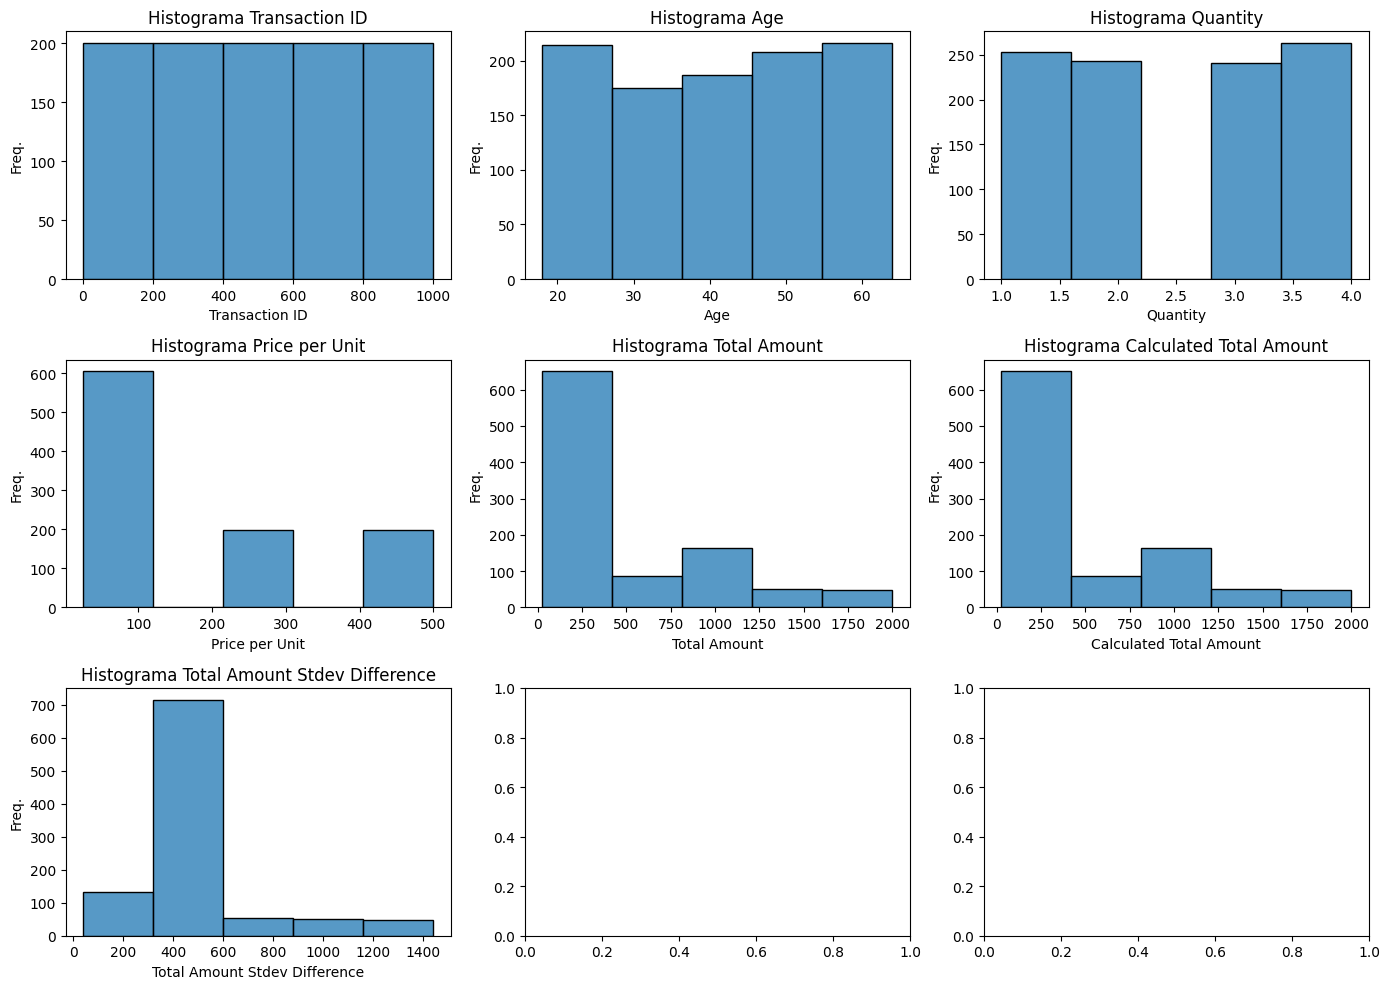

In [75]:
from utils import obtener_columnas_numericas_df, graficar_histogramas

columnas_numericas = obtener_columnas_numericas_df(df)

graficar_histogramas(df, columnas_numericas)

##### Boxplots

['Transaction ID', 'Age', 'Quantity', 'Price per Unit', 'Total Amount', 'Calculated Total Amount', 'Total Amount Stdev Difference']


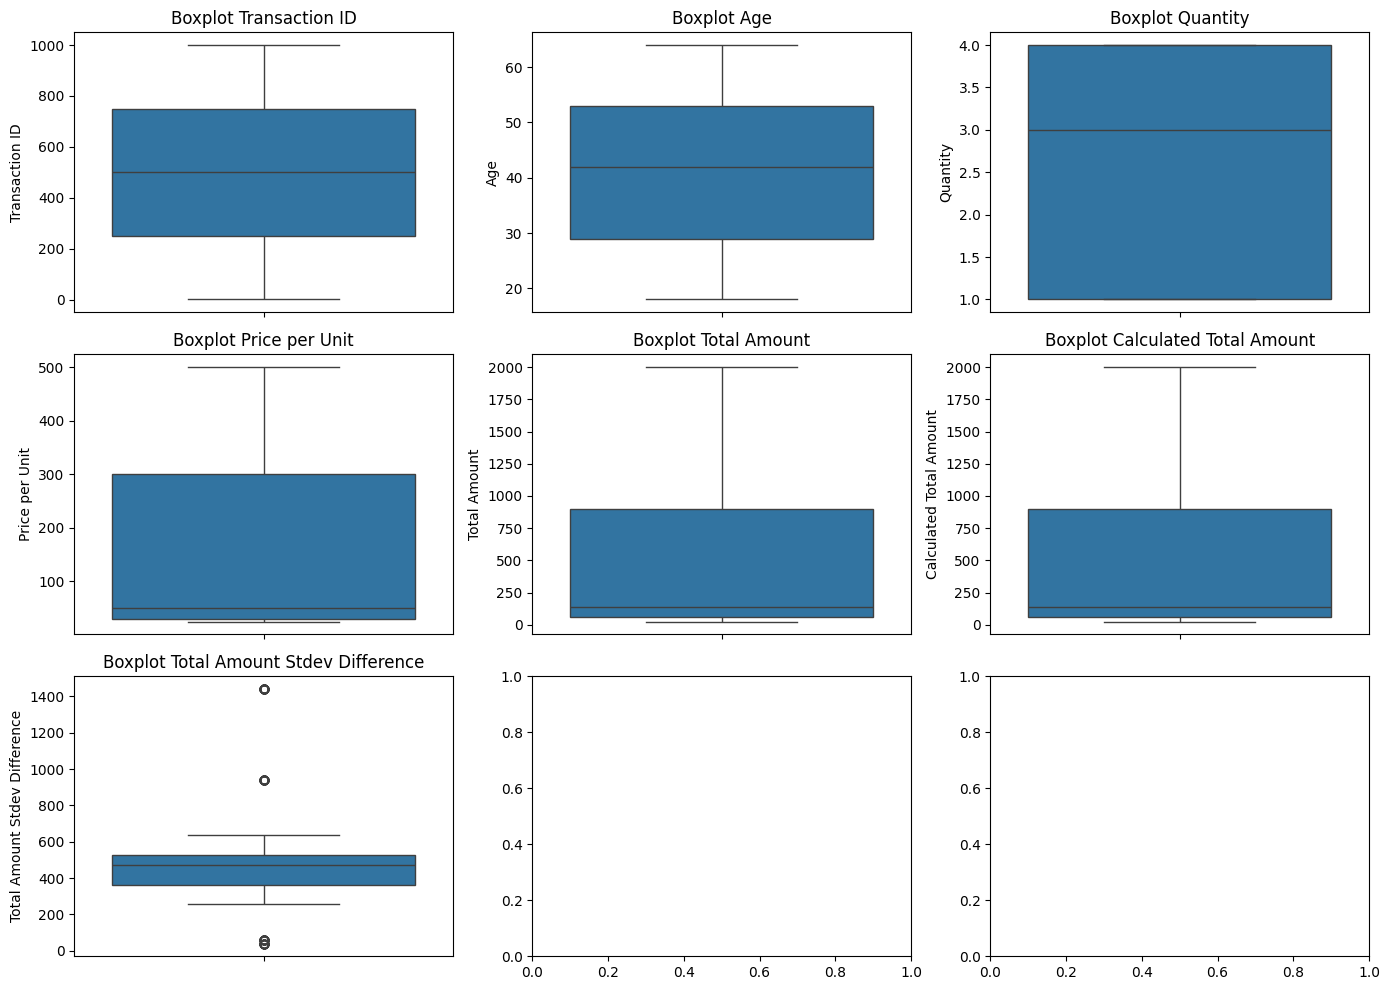

In [76]:
from utils import graficar_boxplots

print(columnas_numericas)

graficar_boxplots(df, columnas_numericas)

#### Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.

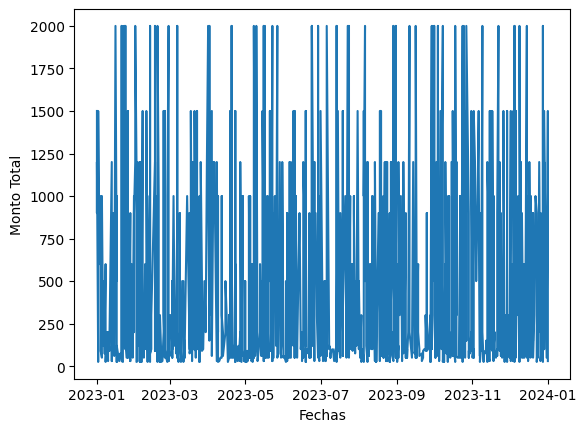

In [77]:
import matplotlib.pyplot as plt


df["Date"] = pd.to_datetime(df["Date"])

df.sort_values(by="Date", inplace=True)

tiempos = pd.to_datetime(df["Date"])
ventas = df["Total Amount"]

plt.plot(tiempos, ventas)
plt.xlabel("Fechas")
plt.ylabel("Monto Total")
plt.show()

Se puede notar que hay una distribución muy desigual de ventas por día. Por lo cual, sería interesante agrupar solo por fecha y ver la evolución de las ventas totales por día.

In [78]:
df_agrupado_suma_fechas = df.groupby("Date")["Total Amount"].sum("Total Amount").reset_index()

df_agrupado_suma_fechas

,Date,Total Amount
0,2023-01-01,3600
1,2023-01-02,1765
2,2023-01-03,600
3,2023-01-04,1240
4,2023-01-05,1100
...,...,...
340,2023-12-27,700
341,2023-12-28,2075
342,2023-12-29,3400
343,2023-12-31,50


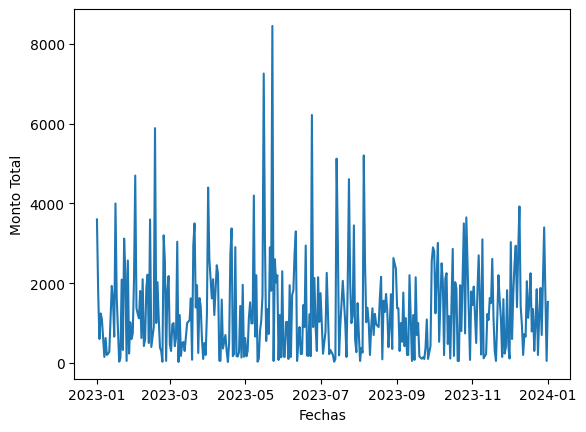

In [79]:
fechas = df_agrupado_suma_fechas["Date"]
cantidades = df_agrupado_suma_fechas["Total Amount"]

plt.plot(fechas, cantidades)
plt.xlabel("Fechas")
plt.ylabel("Monto Total")
plt.show()

##### Utiliza gráficos de dispersión para analizar la relación entre diferentes variables.

Gráfico de dispersión analizando Edad de cliente vs venta total

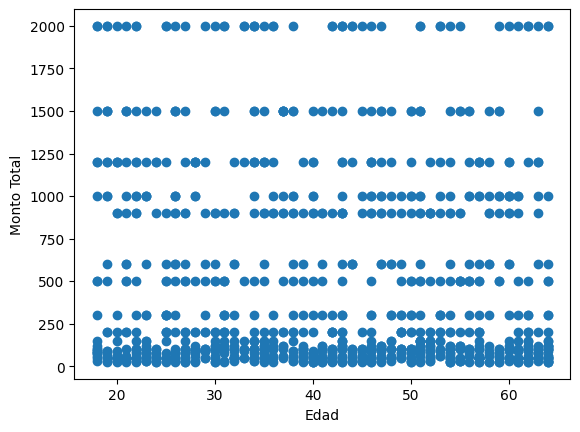

In [80]:
plt.scatter(df["Age"], df["Total Amount"])
plt.xlabel("Edad")
plt.ylabel("Monto Total")
plt.show()

Como se puede ver, no hay mucha relación entre ambas columnas.

A continuación, se investiga la dispersión de la columna de precio por unidad vs cantidad adquirida.

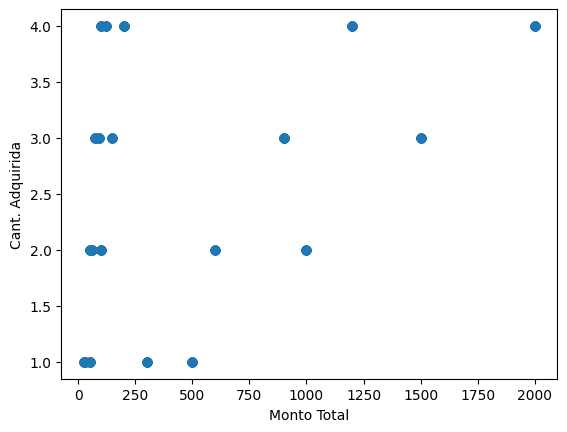

In [81]:
plt.scatter(df["Total Amount"], df["Quantity"])
plt.xlabel("Monto Total")
plt.ylabel("Cant. Adquirida")
plt.show()

##### Combina histogramas y boxplots para visualizar la distribución de las ventas y detectar valores atípicos.

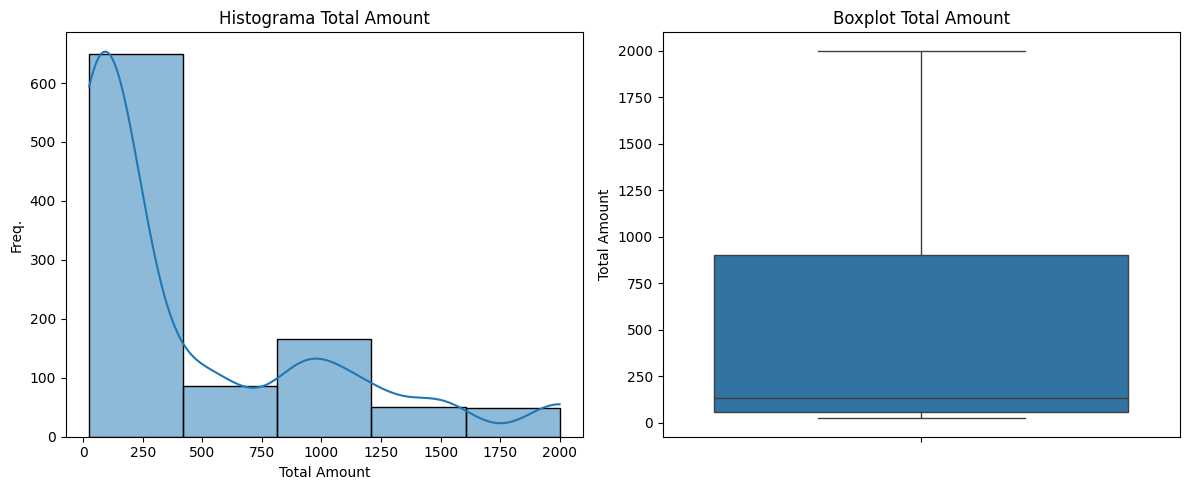

In [82]:
from utils import graficar_histograma_y_boxplot

graficar_histograma_y_boxplot(df["Total Amount"], "Total Amount")

De ambos gráficos, se puede notar que la mayoría de ventas se concentra entre un total de 0 a 1000 usd, siendo valores superiores anómalos.

## Resolución Parte V

#### Realiza un análisis de correlación y crea un mapa de calor para visualizar las relaciones entre las variables.

In [83]:
columnas_de_interes = ["Age", "Price per Unit", "Quantity", "Total Amount"]

# Cálculo de la correlación de Pearson
correlation_matrix = df[[*columnas_de_interes]].corr(method='pearson')
print(correlation_matrix)

# Cálculo de la correlación de Spearman
spearman_corr = df[[*columnas_de_interes]].corr(method='spearman')
print(spearman_corr)

# Cálculo de la correlación de Kendall
kendall_corr = df[[*columnas_de_interes]].corr(method='kendall')
print(kendall_corr)

                     Age  Price per Unit  Quantity  Total Amount
Age             1.000000       -0.038423 -0.023737     -0.060568
Price per Unit -0.038423        1.000000  0.017501      0.851925
Quantity       -0.023737        0.017501  1.000000      0.373707
Total Amount   -0.060568        0.851925  0.373707      1.000000
                     Age  Price per Unit  Quantity  Total Amount
Age             1.000000       -0.037966 -0.023472     -0.037864
Price per Unit -0.037966        1.000000  0.024014      0.857439
Quantity       -0.023472        0.024014  1.000000      0.474103
Total Amount   -0.037864        0.857439  0.474103      1.000000
                     Age  Price per Unit  Quantity  Total Amount
Age             1.000000       -0.027979 -0.017853     -0.026288
Price per Unit -0.027979        1.000000  0.019210      0.724707
Quantity       -0.017853        0.019210  1.000000      0.401932
Total Amount   -0.026288        0.724707  0.401932      1.000000


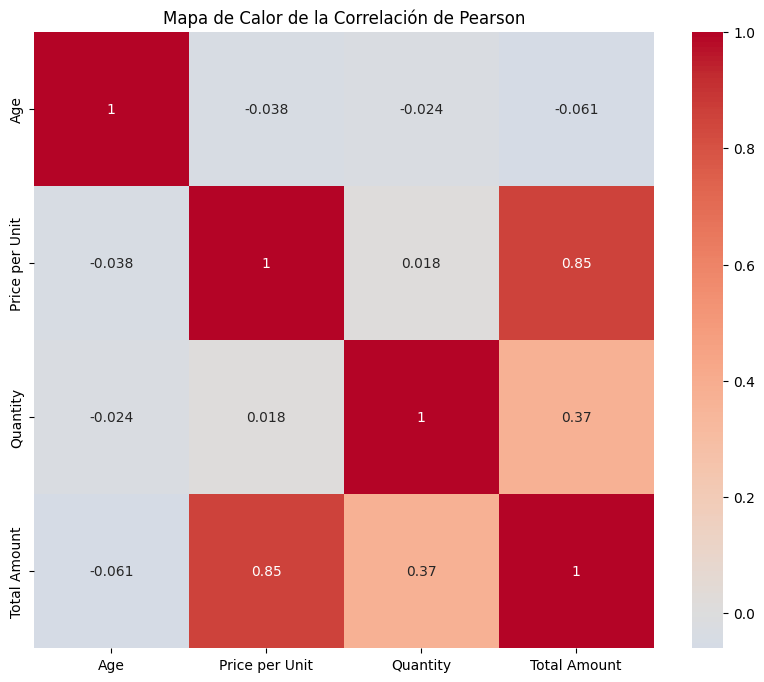

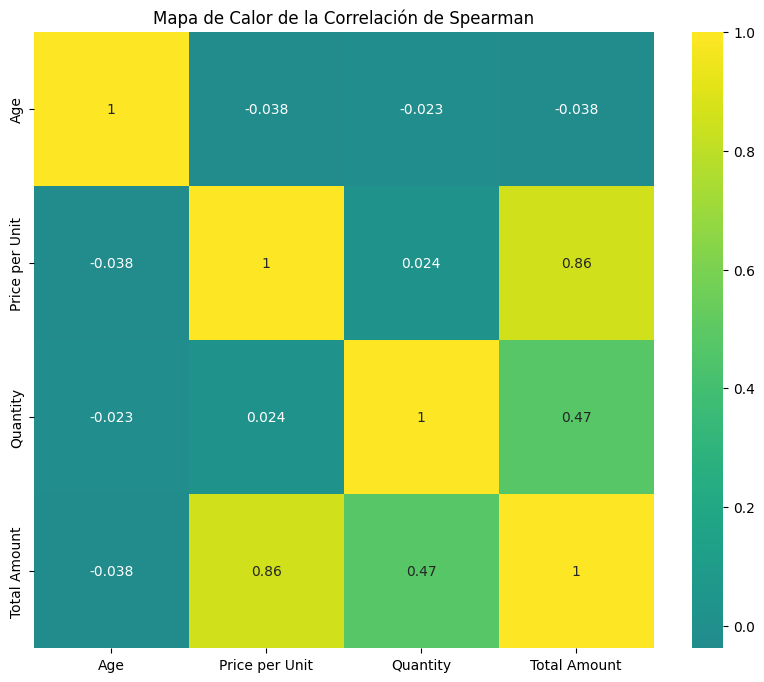

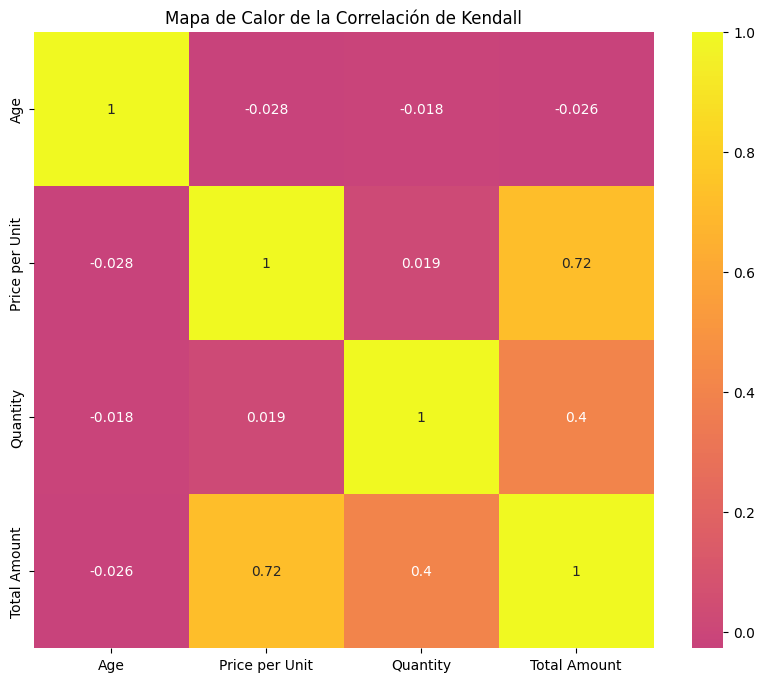

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un mapa de calor para la matriz de correlación de Pearson
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

# Crear un mapa de calor para la matriz de correlación de Spearman
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='viridis', center=0)
plt.title("Mapa de Calor de la Correlación de Spearman")
plt.show()

# Crear un mapa de calor para la matriz de correlación de Kendall
plt.figure(figsize=(10, 8))
sns.heatmap(kendall_corr, annot=True, cmap='plasma', center=0)
plt.title("Mapa de Calor de la Correlación de Kendall")
plt.show()

Como se ve en los mapas de correlación, solo las columnas cantidad, precio por unidad, y monto total, parecen tener una correlación. Pero estas columnas son calculadas usando la cantidad y precio por unidad, por lo que es normal que exista una correlación. Para las demás, no se ve una correlación aparente.

#### Crea subplots para comparar diferentes variables clave.

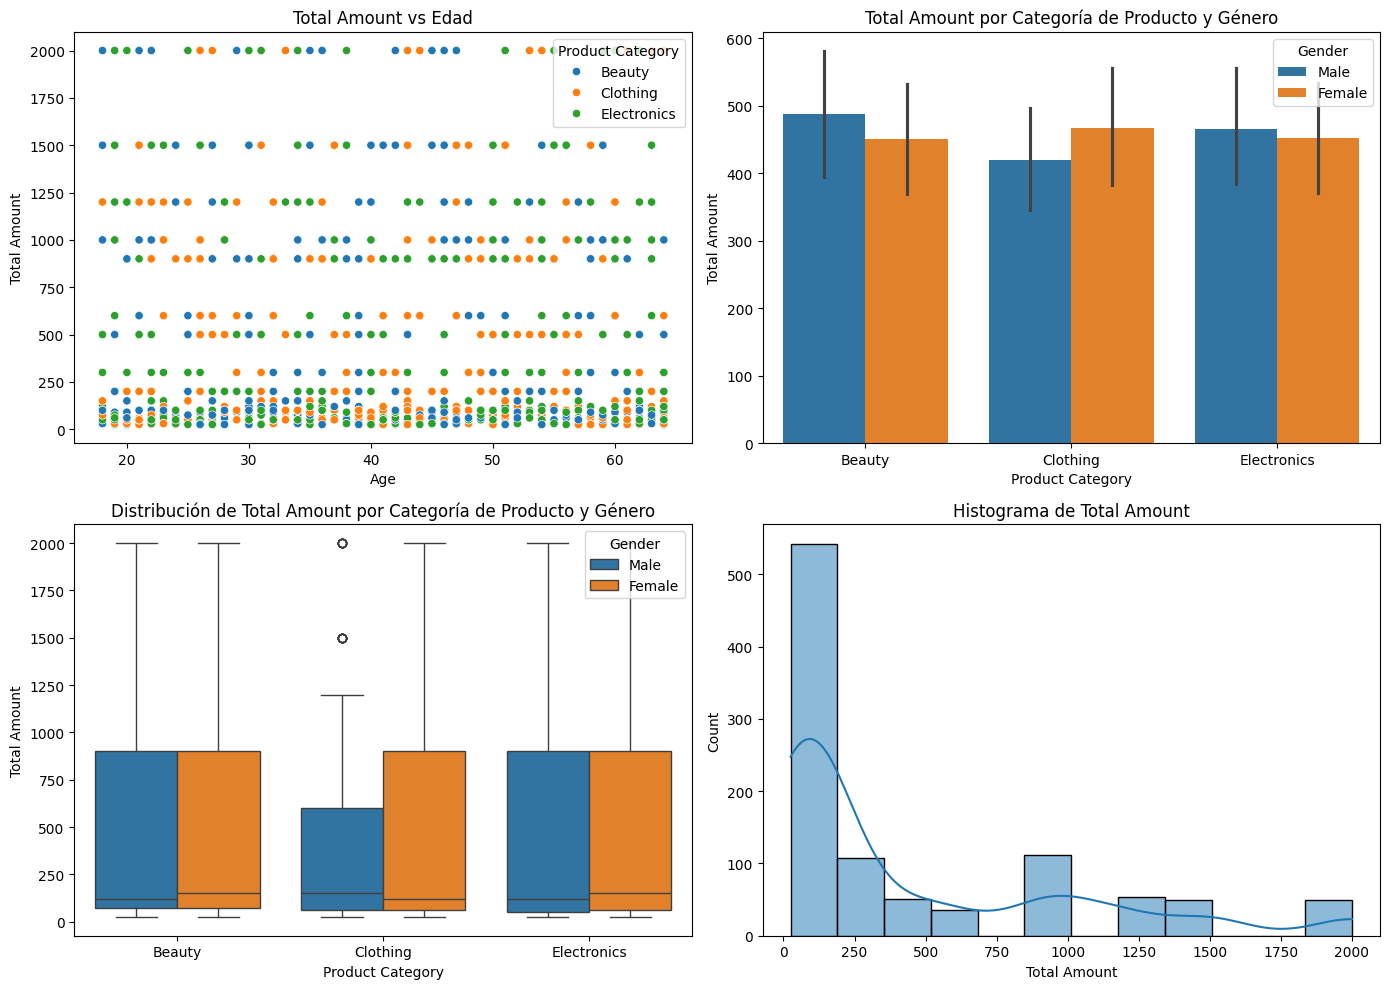

In [85]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico de dispersión
sns.scatterplot(data=df, x='Age', y='Total Amount', hue='Product Category', ax=axs[0, 0])
axs[0, 0].set_title('Total Amount vs Edad')

# Gráfico de barras
sns.barplot(data=df, x='Product Category', y='Total Amount', hue='Gender', ax=axs[0, 1])
axs[0, 1].set_title('Total Amount por Categoría de Producto y Género')

# Gráfico de cajas
sns.boxplot(data=df, x='Product Category', y='Total Amount', hue='Gender', ax=axs[1, 0])
axs[1, 0].set_title('Distribución de Total Amount por Categoría de Producto y Género')

# Histograma
sns.histplot(data=df, x='Total Amount', kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Histograma de Total Amount')

# Ajustar la posición de los subplots para evitar superposición
plt.tight_layout()
plt.show()

#### Añade cuadrículas, leyendas, anotaciones y flechas a tus gráficos para mejorar la claridad y la información.

Número de videojuegos con edad > 25: 831


/tmp/ipykernel_6577/3495411004.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


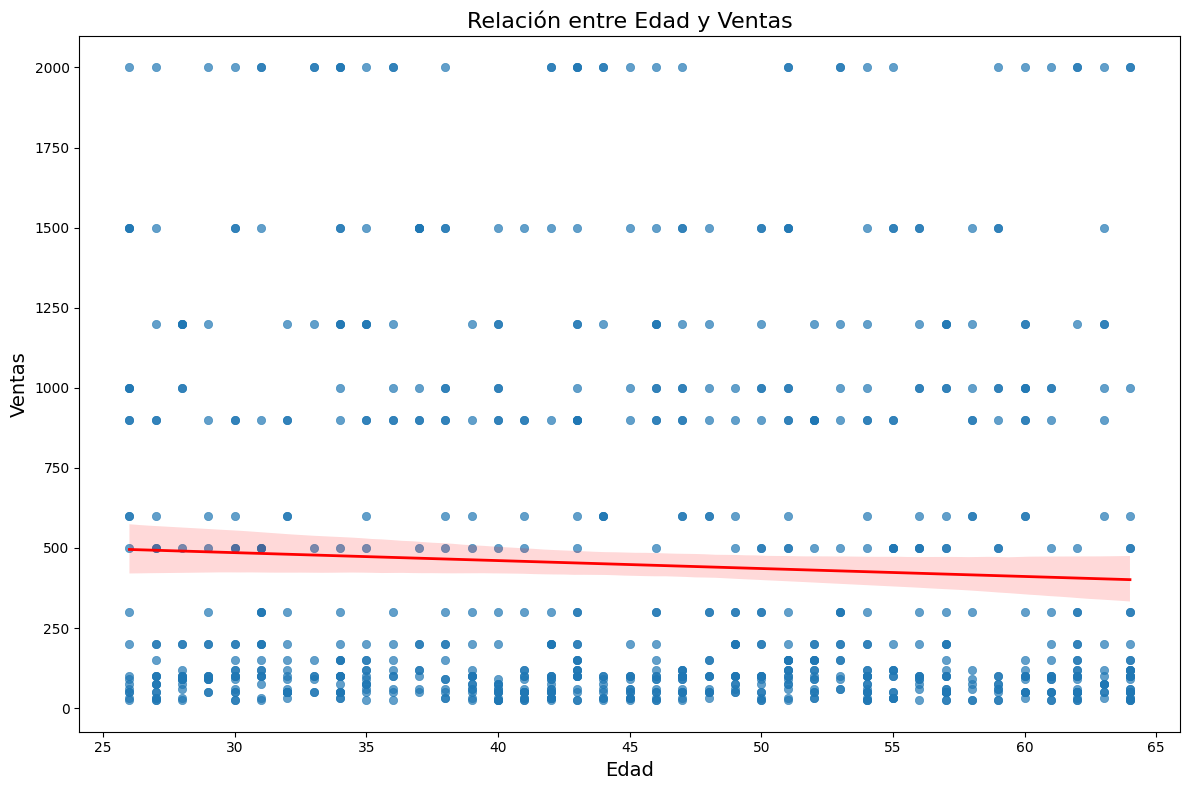

In [95]:
# Definir el umbral de ventas
umbral_edad = 25
df_filtrado = df[(df['Age'] > umbral_edad)]
# Mostrar cuántos ventas cumplen con el criterio
print(f"Número de videojuegos con edad > {umbral_edad}: {df_filtrado.shape[0]}")
df_scatter = df_filtrado[['Age', 'Total Amount']].dropna()
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))
# Crear el diagrama de dispersión usando seaborn
sns.scatterplot(
    x='Age',
    y='Total Amount',
    data=df_scatter,
    palette='viridis',    # Esquema de colores
    alpha=0.7,            # Transparencia de los puntos
    edgecolor=None        # Sin borde en los puntos
)
# Añadir una línea de regresión
sns.regplot(
    x='Age',
    y='Total Amount',
    data=df_scatter,
    scatter=False,
    color='red',
    line_kws={'linewidth': 2}
)
# Añadir títulos y etiquetas
plt.title('Relación entre Edad y Ventas', fontsize=16)
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Ventas', fontsize=14)
# Ajustar el layout para evitar superposiciones
plt.tight_layout()
# Mostrar el gráfico
plt.show()

#### Análisis de datos agrupados.

Obtenemos los totales de ventas por categoría y graficamos.

In [87]:
df_agrupado_suma_categorias = df.groupby("Product Category")["Total Amount"].sum("Total Amount").reset_index().sort_values("Total Amount", ascending=False)

df_agrupado_suma_categorias

,Product Category,Total Amount
2,Electronics,156905
1,Clothing,155580
0,Beauty,143515


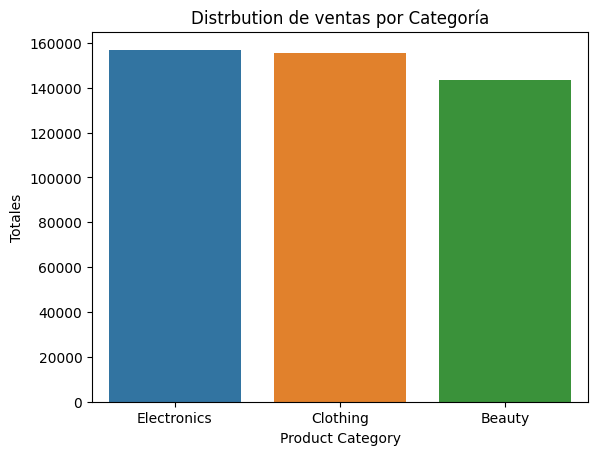

In [88]:
sns.barplot(
    df_agrupado_suma_categorias,
    x='Product Category',
    y='Total Amount',
    hue='Product Category',
)
plt.ylabel('Totales')
plt.title('Distrbution de ventas por Categoría')
plt.show()


Obtenemos las cantidades de ventas por categoría y graficamos.

In [89]:
df_agrupado_cant_categorias = df.groupby("Product Category")["Total Amount"].count().reset_index().sort_values("Total Amount", ascending=False)

df_agrupado_cant_categorias

,Product Category,Total Amount
1,Clothing,351
2,Electronics,342
0,Beauty,307


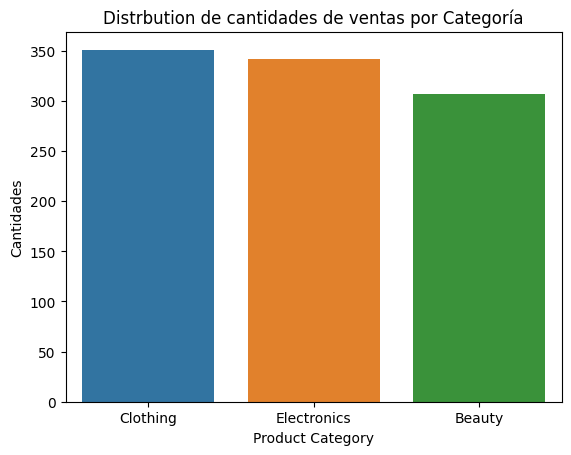

In [90]:
sns.barplot(
    df_agrupado_cant_categorias,
    x='Product Category',
    y='Total Amount',
    hue='Product Category',
)
plt.ylabel('Cantidades')
plt.title('Distrbution de cantidades de ventas por Categoría')
plt.show()

In [91]:
df_agrupado_sum_categorias_generos = df.groupby(
    by=["Product Category", "Gender"])[
        ["Total Amount"]
    ].sum("Total Amount").reset_index().sort_values(
        "Total Amount",
        ascending=False
    )

df_agrupado_sum_categorias_generos

,Product Category,Gender,Total Amount
2,Clothing,Female,81275
5,Electronics,Male,80170
4,Electronics,Female,76735
0,Beauty,Female,74830
3,Clothing,Male,74305
1,Beauty,Male,68685


Graficamos totales por Categoría y Género

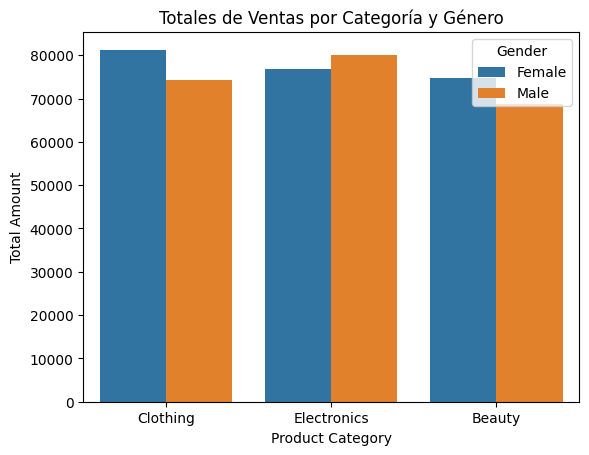

In [92]:
sns.barplot(
    df_agrupado_sum_categorias_generos,
    x='Product Category',
    y='Total Amount',
    hue='Gender',
)
plt.title("Totales de Ventas por Categoría y Género")
plt.show()

In [93]:
df_agrupado_cant_categorias_generos = df.groupby(by=["Product Category", "Gender"])[["Total Amount"]].count().reset_index().sort_values("Total Amount", ascending=False)

df_agrupado_cant_categorias_generos

,Product Category,Gender,Total Amount
3,Clothing,Male,177
2,Clothing,Female,174
5,Electronics,Male,172
4,Electronics,Female,170
0,Beauty,Female,166
1,Beauty,Male,141


Graficamos cantidades por Categoría y Género

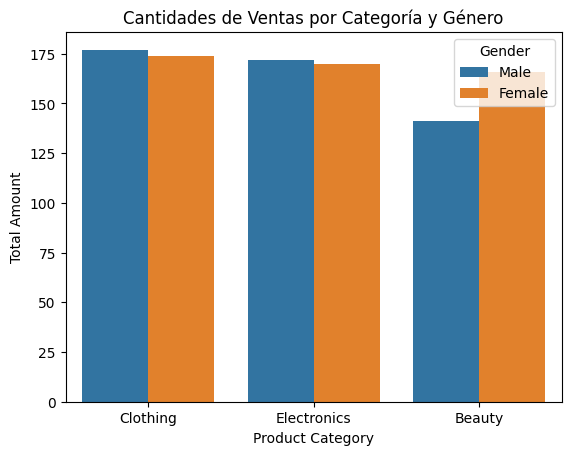

In [94]:
sns.barplot(
    df_agrupado_cant_categorias_generos,
    x='Product Category',
    y='Total Amount',
    hue='Gender',
)
plt.title("Cantidades de Ventas por Categoría y Género")
plt.show()

Analizamos si se puede graficar por edad.

In [96]:
df["Age"].unique()

array([46, 41, 40, 19, 64, 37, 26, 38, 23, 30, 57, 60, 58, 54, 51, 45, 63,
       27, 31, 33, 18, 53, 50, 43, 24, 34, 42, 39, 49, 59, 22, 36, 28, 56,
       29, 47, 20, 32, 25, 35, 21, 52, 48, 62, 61, 55, 44])

Al parecer, todas las edades son enteros, por lo que la columna se puede usar como dato categórico y agrupar.

In [102]:
df_agrupado_sum_edades = df.groupby(
    by=["Age"])[["Total Amount"]].sum("Total Amount").reset_index().sort_values(
        "Total Amount",
        ascending=False
    )

df_agrupado_sum_edades

,Age,Total Amount
25,43,17970
16,34,16785
33,51,16065
1,19,14870
8,26,13980
4,22,13700
28,46,13090
3,21,12585
29,47,12505
19,37,11650


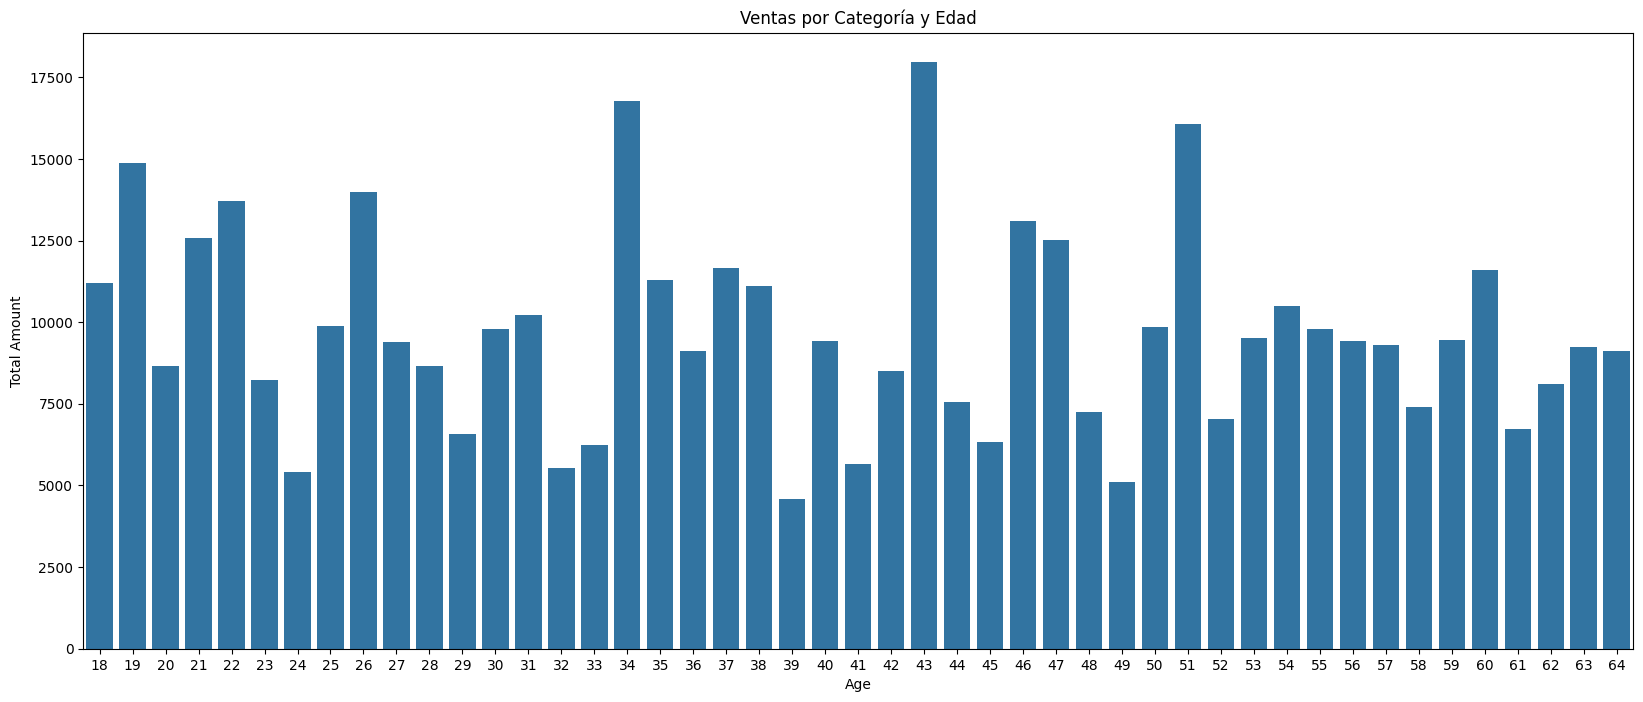

In [107]:
plt.figure(figsize=(20, 8))
sns.barplot(
    df_agrupado_sum_edades,
    x='Age',
    y='Total Amount',
)
plt.title("Ventas por Categoría y Edad")
plt.show()

Graficamos cantidades de ventas por edad.

In [108]:
df_agrupado_cant_edades = df.groupby(
    by=["Age"])[["Total Amount"]].count().reset_index().sort_values(
        "Total Amount",
        ascending=False
    )

df_agrupado_cant_edades

,Age,Total Amount
25,43,31
46,64,31
33,51,30
39,57,30
36,54,28
16,34,28
4,22,27
44,62,27
24,42,26
29,47,26


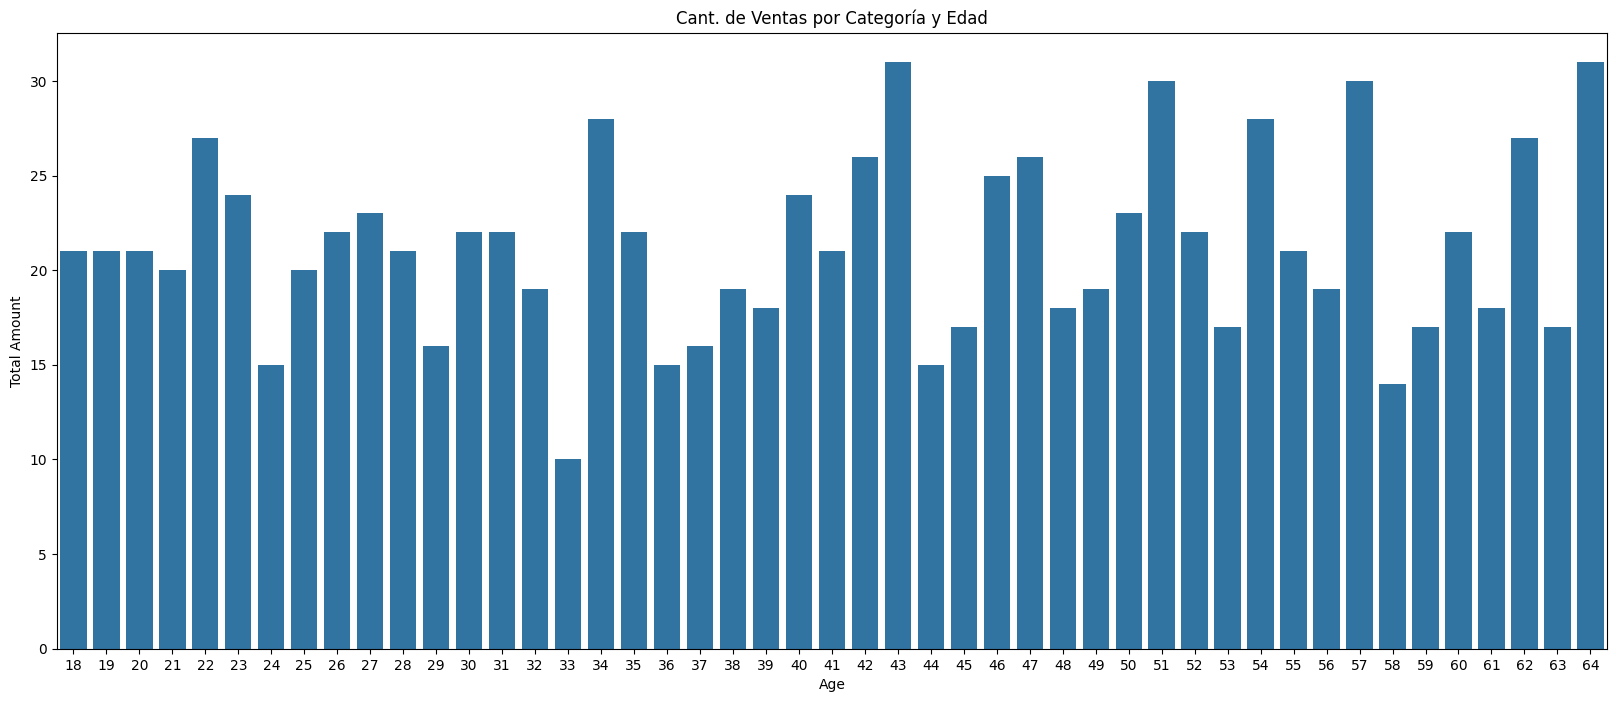

In [109]:
plt.figure(figsize=(20, 8))
sns.barplot(
    df_agrupado_cant_edades,
    x='Age',
    y='Total Amount',
)
plt.title("Cant. de Ventas por Categoría y Edad")
plt.show()